- 파일이 잘 불러오는지 확인

In [12]:
import pandas as pd
baseFolder = 'C:/dataLec/titanic/'
titanic_df = pd.read_csv(baseFolder+'./train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- 데이터 행 크기, 칼럼 갯수, 칼럼 데이터 타입 알아보기

In [13]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- 데이터 확인
    - 랜덤으로 인덱스를 입력해서 확인해보기

In [14]:
def randomIndex(data, num):
    import random
    ran = [random.randrange(0,len(data)) for x in range(num)]
    display(data.iloc[ran]) # titanic_df.iloc[[12,3,4,1,4]]

randomIndex(titanic_df, 5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
138,139,0,3,"Osen, Mr. Olaf Elon",male,16.0,0,0,7534,9.2167,NaN,S
225,226,0,3,"Berglund, Mr. Karl Ivar Sven",male,22.0,0,0,PP 4348,9.3500,NaN,S
584,585,0,3,"Paulner, Mr. Uscher",male,NaN,0,0,3411,8.7125,NaN,C
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
218,219,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C


- 숫자로 변환시켜야 하는 문자 데이터 확인하기

In [15]:
display(titanic_df['Embarked'].value_counts()) # 0,1,2로 처리하면 됨

titanic_df['Cabin'].value_counts() # 여러 데이터가 있는 문자열 칼럼
display(titanic_df['Cabin'].str[:1].value_counts()) 
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1] # 앞자리만 남기고 자르기

titanic_df['Sex'].value_counts() # 0,1

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Cabin
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64

Sex
male      577
female    314
Name: count, dtype: int64

- 결측치 있는 칼럼 확인하고 수정하기

In [16]:
titanic_df.isna().sum()

# Age는 평균으로 처리
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)

# Cabin와 Embarekd는 N으로 처리
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)

# 결측치 다 더해서 혹시 더 있는지 확인
titanic_df.isna().sum().sum() 

0

- EDA
    - 상관계수
    - 성별비율
    - 결정값과 관련 계수 조사
        - 성별과 생존율
        - 선실등급과 생존율
        - 나이별 생존율

<hr>

- 상관계수
    - 피처간의 상관관계
    - corr()
    - 플로트나 인트만 사용이 가능하다
    ```python

    좋지 않은 방법:
    titanic_df.drop('Name' axis=1)
    # 하나하나 드랍시키지 말고
    # int나 float 관련된 칼럼들만 모아서 상관계수를 찾아보면 된다
    ```

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


<Axes: >

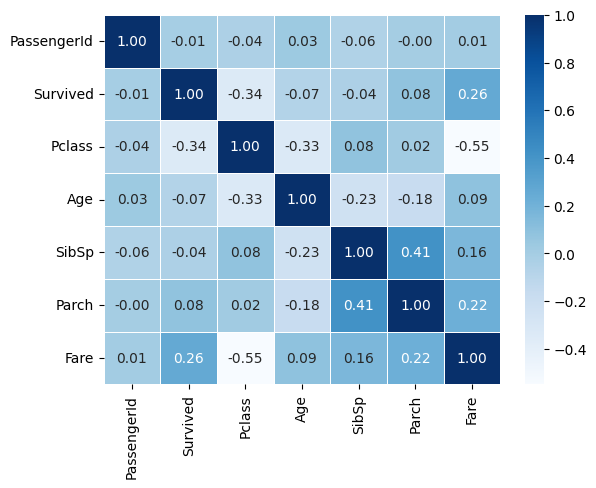

In [17]:
import seaborn as sns

dTypesArr = ['int64', 'float64']
numArr = []

dty = titanic_df.dtypes
for idx,val in zip(dty.index,dty.values):
    if val in dTypesArr:
        numArr.append(idx)
corrDF = titanic_df[numArr].corr(method='pearson', min_periods=1, numeric_only=False) 
display(corrDF)
sns.heatmap(data=corrDF, annot=True, fmt='.2f', linewidths=.5,cmap='Blues')

- 성별비율
    ```python
    titanic_df['Sex'].value_counts()[0]은 577, index는 male
    pd.DataFrame({딕셔너리})
    ```

,name,val,ratio
0,male,577,64.76
1,female,314,35.24


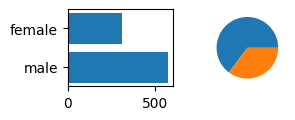

In [18]:
gen = titanic_df['Sex']
ratioVal = gen.value_counts()/gen.count() * 100
pd.DataFrame({'name':gen.value_counts().index, 'val':gen.value_counts().values, 'ratio':ratioVal})

def ratioChart(data, field):
    import matplotlib.pyplot as plt
    tmp = data[field].value_counts()
    ratio = [round(x/tmp.sum()*100,2) for x in tmp]
    display(pd.DataFrame({'name':tmp.index, 'val':tmp.values, 'ratio':ratio}))
    plt.figure(figsize=(3,1))
    plt.subplot(1,2,1)
    plt.barh(tmp.index, tmp.values)
    plt.subplot(1,2,2)
    plt.pie(tmp.values)
    
ratioChart(titanic_df, 'Sex')


- 성별과 생존율
    - groupby()['열'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

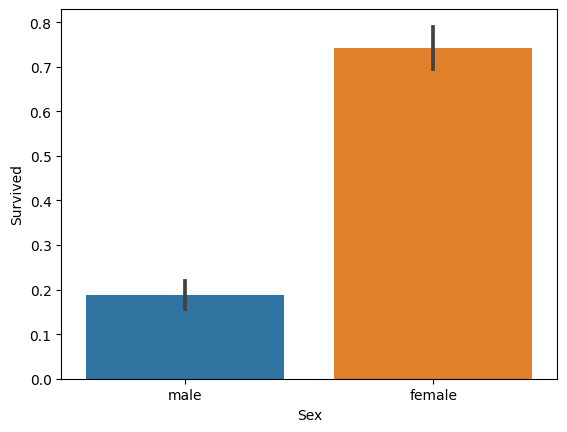

In [19]:
import matplotlib.pyplot as plt
display(titanic_df.groupby(['Sex','Survived'])['Survived'].count())
sns.barplot(x='Sex', y='Survived', data=titanic_df)

- 선실등급과 생존율

<Axes: xlabel='Pclass', ylabel='Survived'>

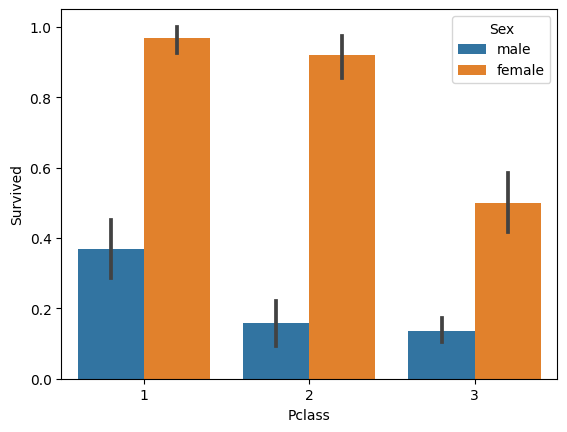

In [20]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

- 나이별 생존율

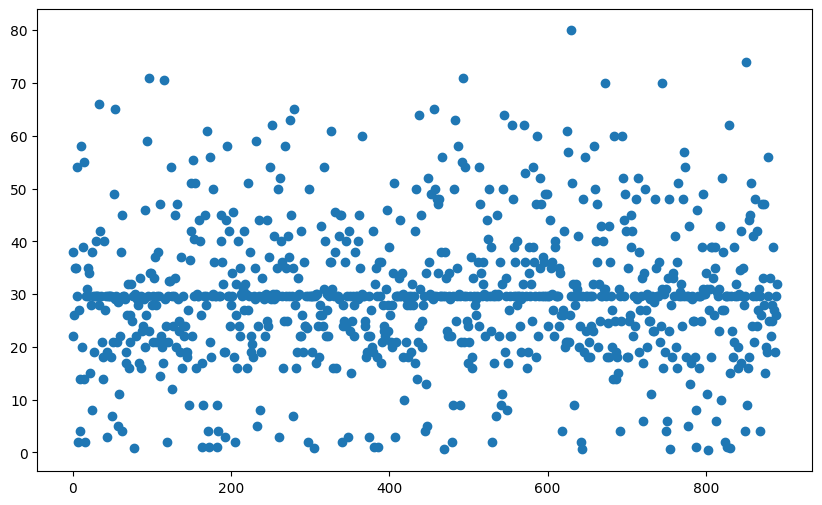

In [21]:
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

plt.figure(figsize=(10,6))

# 순차 표기
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# 'Age'의 데이터를 get_category(age)의 인자로 보내고 리턴을 'Age_cat'에 저장
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))

plt.scatter(titanic_df.index, titanic_df['Age'])

문자 피처  
Embarked  
Cabin  
Sex  

불필요한 피처  
PassengerId  
Name  
Ticket 


In [22]:
from sklearn import preprocessing

def pre(data):
    field = ['Sex','Cabin','Embarked']
    le = preprocessing.LabelEncoder()
    for x in field:
        le = le.fit(data[x])
        data[x] = le.transform(data[x])
    return data

# titanic_df['Cabin'].value_counts()
titanic_df2 = pre(titanic_df)
titanic_df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3,Young Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3,Young Adult


#### 처음부터 다시 시작한다
- 필수작업
    - 머신러닝 문자데이터 -> 숫자
    - 결측치 처리

In [23]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [24]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
titanic_df = pd.read_csv('C:/dataLec/titanic/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))


DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도: 0.8659


In [28]:
from sklearn.model_selection import KFold
import numpy as np

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한  리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행. 
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 
# exec_kfold 호출
exec_kfold(dt_clf , folds=5) 


교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [29]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))


GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
